# **Classification of Netflix Titles Using Machine Learning**

## **OBJECTIVES**
We classify Netflix titles into Movie vs TV Show.

**Business value:** content tagging, recommendation systems, catalog management

__Import Necessary Libraries & load data__

In [32]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 

df = pd.read_csv(r"netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


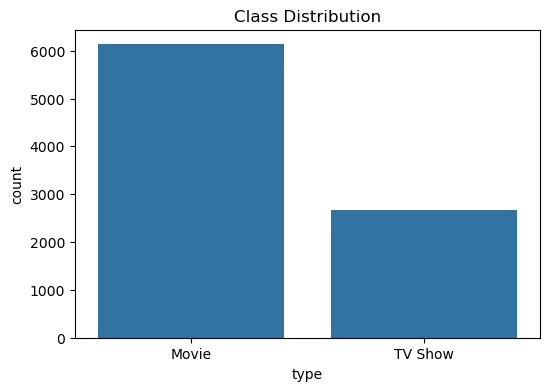

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df)
plt.title("Class Distribution")
plt.show()

**TOP 10 GENRES**

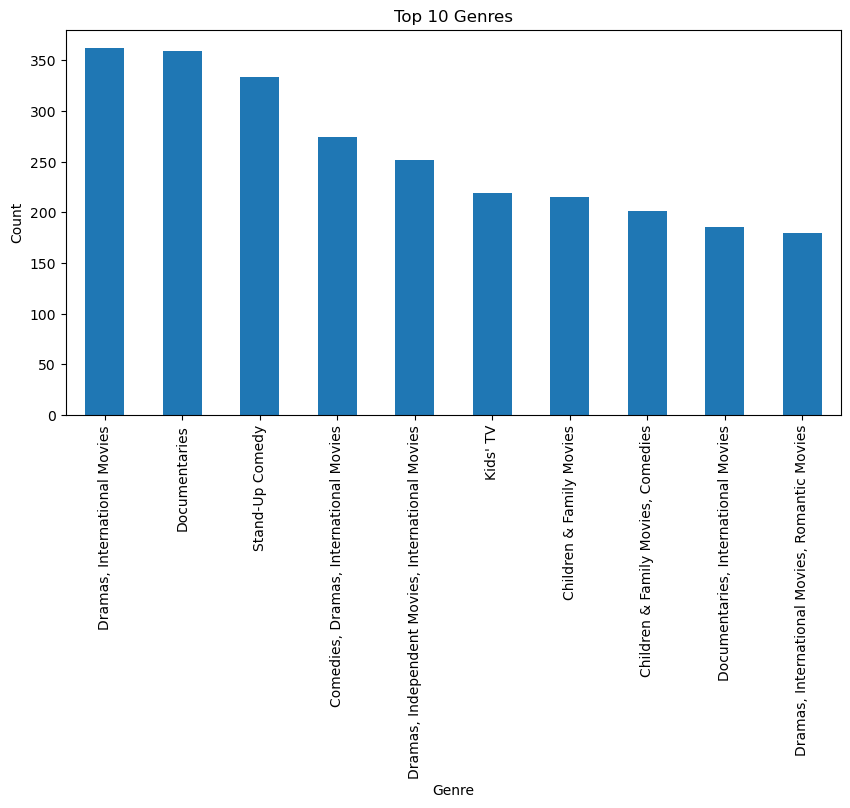

In [29]:
plt.figure(figsize=(10,5))
df['listed_in'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()


**RELEASE YEAR TREND**

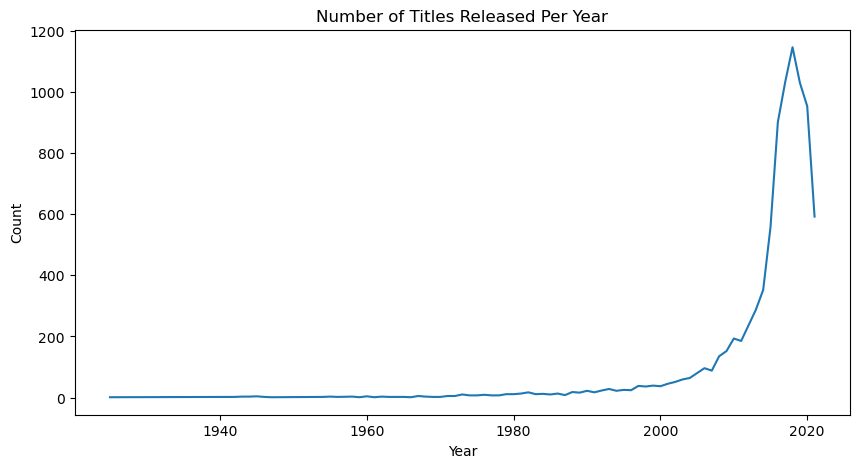

In [30]:
plt.figure(figsize=(10,5))
df['release_year'].value_counts().sort_index().plot()
plt.title("Number of Titles Released Per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


#    **Basic Description**


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [3]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [4]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

**HANDLING MISSING VALUES**

In [5]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Not Available')
df['country'] = df['country'].fillna('Unknown Country')

In [6]:
df = df.dropna(subset=['date_added'])

df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])



In [7]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

**ENCODE THE TARGET (MOVIE/TV SHOW)**

In [8]:
le = LabelEncoder()
df['type_encoded'] = le.fit_transform(df['type'])

**SELECT FEATURES**

In [9]:
df['combined_text'] = df['title']+ "" + df['director']+ ""+ df['cast']+" "+ df['listed_in']+" "+df['description']

In [10]:
X = df['combined_text']
y = df['type_encoded']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

**CONVERT TEXT TO NUMBERS**

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

**MODEL 1: LOGISTIC REGRESSION**

In [18]:
model_lr = LogisticRegression(max_iter=2000)

model_lr.fit(X_train_tfidf, y_train)

pred_lr = model_lr.predict(X_test_tfidf)

**MODEL 2: DECISION TREE CLASSIFIER**

In [19]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_tfidf, y_train)

pred_dt = model_dt.predict(X_test_tfidf)

**MODEL 3: RANDOM FOREST CLASSIFIER**

In [20]:
model_rf = RandomForestClassifier(n_estimators=2000, random_state=42)
model_rf.fit(X_train_tfidf,y_train)

pred_rf = model_rf.predict(X_test_tfidf)

**MODEL ACCURACY**

In [23]:
acc_lr = accuracy_score(y_test, pred_lr)
acc_dt = accuracy_score(y_test, pred_dt)
acc_rf = accuracy_score(y_test, pred_rf)

print("Logistic Regression Accuracy -> ", acc_lr)
print("Decision Tree Accuracy -> ", acc_dt)
print("Random Forest Accuracy -> ",acc_rf)

Logistic Regression Accuracy ->  0.9795454545454545
Decision Tree Accuracy ->  0.9948863636363636
Random Forest Accuracy ->  0.9954545454545455


**COMPARE ALL MODELS AND CHOOSE THE BEST MODEL**

In [24]:
results = { 
    "Logistic Regression": acc_lr,
    "Decision Tree" : acc_dt, 
    "Random Forest" : acc_rf
}
 

best_model = max(results, key=results.get)
print("Best Model:", best_model)

Best Model: Random Forest


**FINAL SUMMARY**

-Random Forest achieved the highest accuracy.
- Key drivers: duration, genre keywords, release year.
- Recommendation: use Random Forest for deployment.
- Next Steps: NLP on description, director/cast embeddings.